In [16]:
import pandas as pd

# 🧾 Step 1: Basic Data Overview

In [17]:
# Basic info
# Display the shape of the dataset
df = pd.read_csv("/content/lfw_arnie_nonarnie.csv")
# Show basic info
print(df.head())
print(df.info())

          0         1         2         3         4         5         6  \
0 -2.061987  0.581320 -0.249115 -0.631340 -1.359899  0.751619 -0.029364   
1 -0.796838 -0.667228 -0.107889  0.019755 -0.686348  0.912779  0.463412   
2  5.376779  1.142695  2.543111 -2.727212  0.272785 -0.972187  1.111221   
3  7.029235  1.242883 -2.628079  1.224479 -1.141370 -1.620647  0.205890   
4  5.484822  6.752706 -4.291114  1.740412 -1.603087 -1.075175  1.919936   

          7         8         9  ...       141       142       143       144  \
0  1.610456  0.341402  1.286709  ... -0.356844 -0.016488 -0.228473  0.258134   
1 -0.238308 -0.294023  0.215470  ... -0.037243 -0.012105 -0.351285 -0.034968   
2  1.645502 -2.556968 -0.648781  ...  0.157441 -0.333875 -0.303720 -0.085975   
3  1.567561  0.736200  0.010782  ...  0.051040 -0.068796  0.141841 -0.227999   
4 -0.197615  1.030596  1.451936  ...  0.034412  0.265141  0.226000  0.032064   

        145       146       147       148       149  Label  
0  0.04

# 📦 Step 2: Import Required Libraries

In [18]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Label', axis=1)
y = df['Label']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
# Importing the Multi-layer Perceptron classifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Importing the Multi-layer Perceptron classifier
model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        30
           1       1.00      0.12      0.22         8

    accuracy                           0.82        38
   macro avg       0.91      0.56      0.56        38
weighted avg       0.85      0.82      0.75        38

Accuracy: 0.8157894736842105


In [20]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Step 2: Load the dataset
df = pd.read_csv('lfw_arnie_nonarnie.csv')  # Replace with actual path if different

# Step 3: Understand the structure
print("Shape of data:", df.shape)
print("Column names:", df.columns)
print(df.head())

# Step 4: Split features and target
X = df.drop('Label', axis=1)
y = df['Label']

# Step 5: Train-test split
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# Step 6: Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Build Neural Network model
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Step 8: Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 9: Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=30,
                    batch_size=32)

# Step 10: Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Optional: Save model
model.save('classification_model.h5')

Shape of data: (190, 151)
Column names: Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '141', '142', '143', '144', '145', '146', '147', '148', '149', 'Label'],
      dtype='object', length=151)
          0         1         2         3         4         5         6  \
0 -2.061987  0.581320 -0.249115 -0.631340 -1.359899  0.751619 -0.029364   
1 -0.796838 -0.667228 -0.107889  0.019755 -0.686348  0.912779  0.463412   
2  5.376779  1.142695  2.543111 -2.727212  0.272785 -0.972187  1.111221   
3  7.029235  1.242883 -2.628079  1.224479 -1.141370 -1.620647  0.205890   
4  5.484822  6.752706 -4.291114  1.740412 -1.603087 -1.075175  1.919936   

          7         8         9  ...       141       142       143       144  \
0  1.610456  0.341402  1.286709  ... -0.356844 -0.016488 -0.228473  0.258134   
1 -0.238308 -0.294023  0.215470  ... -0.037243 -0.012105 -0.351285 -0.034968   
2  1.645502 -2.556968 -0.648781  ...  0.157441 -0.333875 -0.303720 -0.085975   
3  1.56

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.6950 - loss: 0.6613 - val_accuracy: 0.7895 - val_loss: 0.5483
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7745 - loss: 0.4842 - val_accuracy: 0.7895 - val_loss: 0.5503
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8392 - loss: 0.4103 - val_accuracy: 0.7895 - val_loss: 0.5687
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8097 - loss: 0.3743 - val_accuracy: 0.7895 - val_loss: 0.5726
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8327 - loss: 0.3218 - val_accuracy: 0.7895 - val_loss: 0.5701
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8641 - loss: 0.2791 - val_accuracy: 0.7895 - val_loss: 0.5665
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8911 - loss: 0.2824 - val_accuracy: 0.7895 - val_loss: 0.5670
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8868 - loss: 0.2511 - val_accuracy: 0.7895 - val_loss: 0.5724
Epoch 9/30


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88        30
           1       0.00      0.00      0.00         8

    accuracy                           0.79        38
   macro avg       0.39      0.50      0.44        38
weighted avg       0.62      0.79      0.70        38

Confusion Matrix:
 [[30  0]
 [ 8  0]]


# 📊 Step 3: Visualizing Model Accuracy

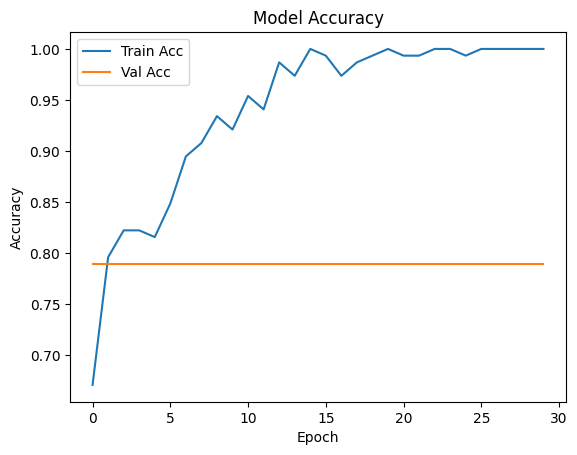

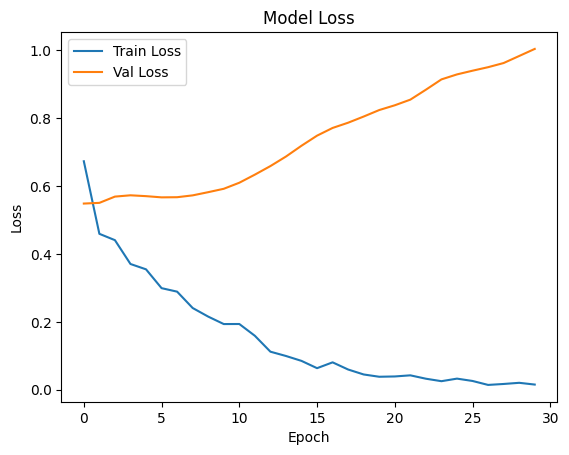

In [21]:
import matplotlib.pyplot as plt

# Accuracy plot
# Plotting accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Acc')
# Plotting accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
# Plotting accuracy over epochs
plt.plot(history.history['loss'], label='Train Loss')
# Plotting accuracy over epochs
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
# Save as app.py and run: streamlit run app.py
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf

model = tf.keras.models.load_model('/content/classification_model.h5')

st.title("Employee Face Recognition")

uploaded_file = st.file_uploader("Upload a Face Image")

if uploaded_file:
    image = Image.open(uploaded_file).resize((224,224))
    img_array = np.array(image)/255.0
    prediction = model.predict(img_array.reshape(1, 224, 224, 3))
    label = np.argmax(prediction)
    confidence = np.max(prediction)
    st.image(image)
    st.success(f"Prediction: Class {label} (Confidence: {confidence:.2f})")


2025-06-20 18:34:44.614 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 18:34:44.984 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-20 18:34:44.985 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 18:34:44.988 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 18:34:44.990 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 18:34:44.993 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 18:34:44.996 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 18:34:44.998 Thread 'MainThread': mi